# Bayesian Regression

Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

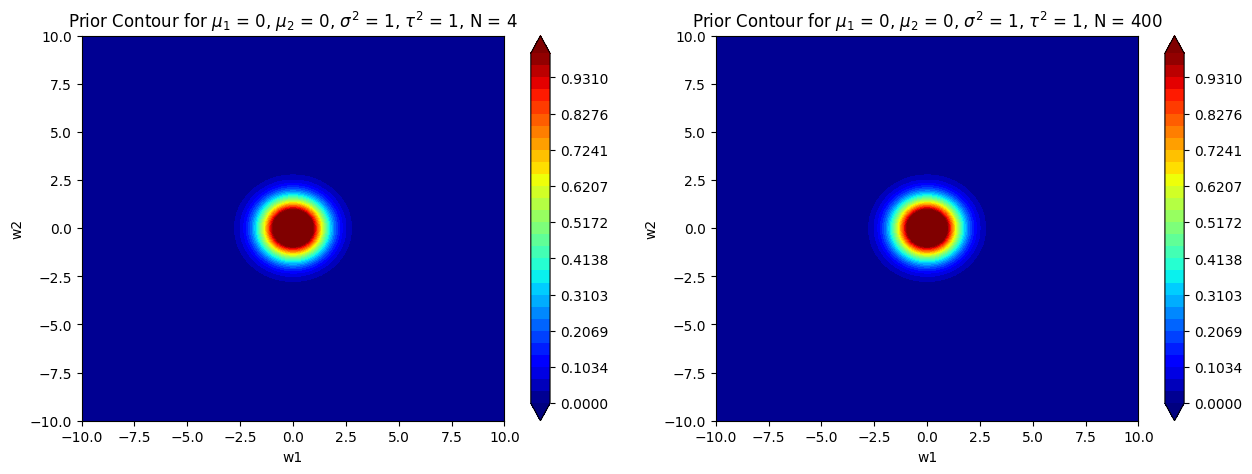

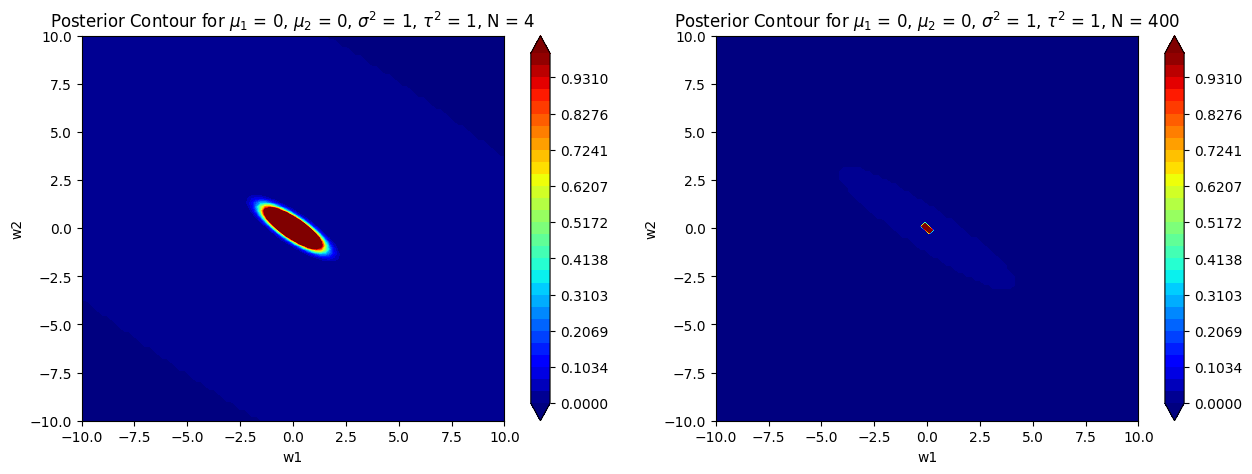

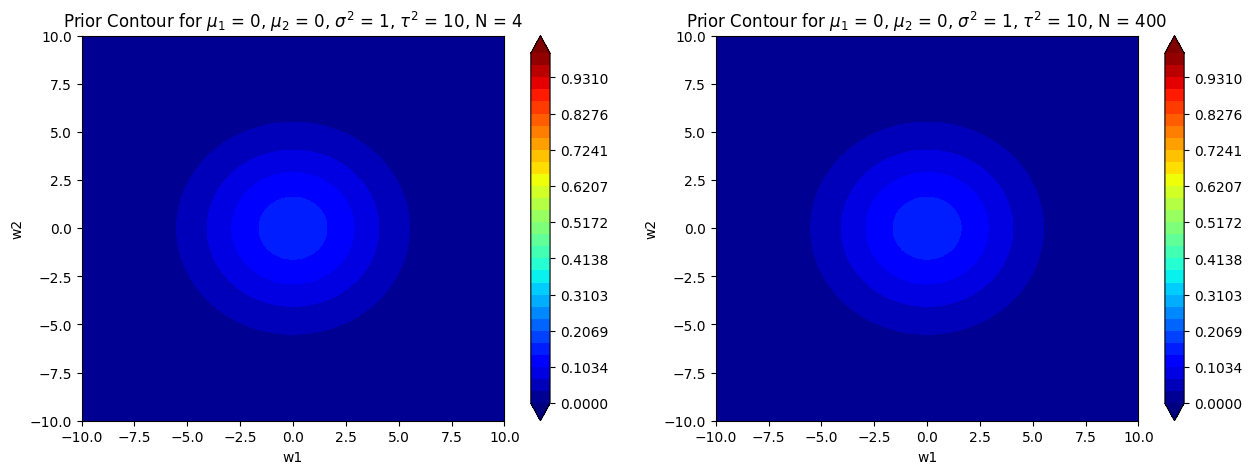

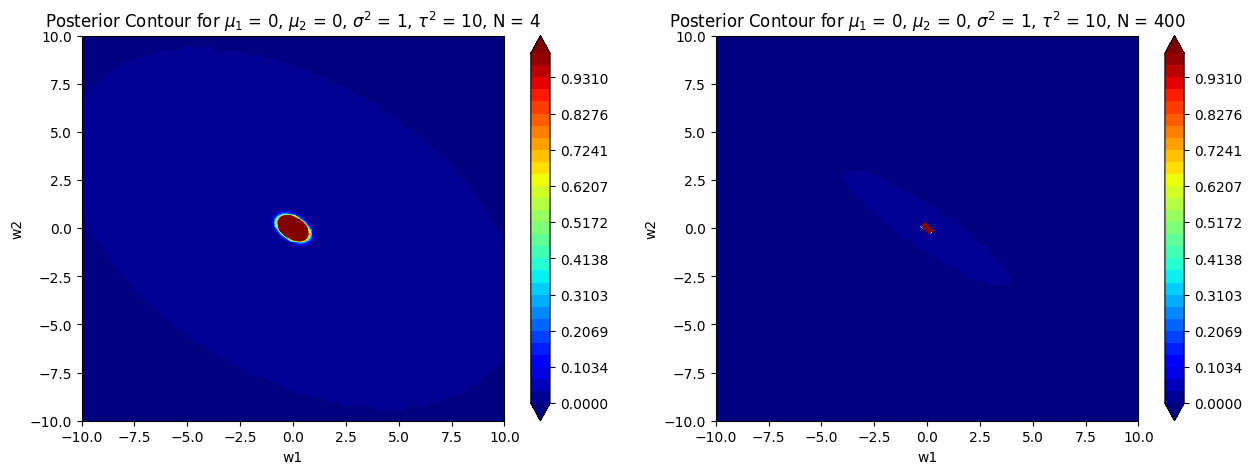

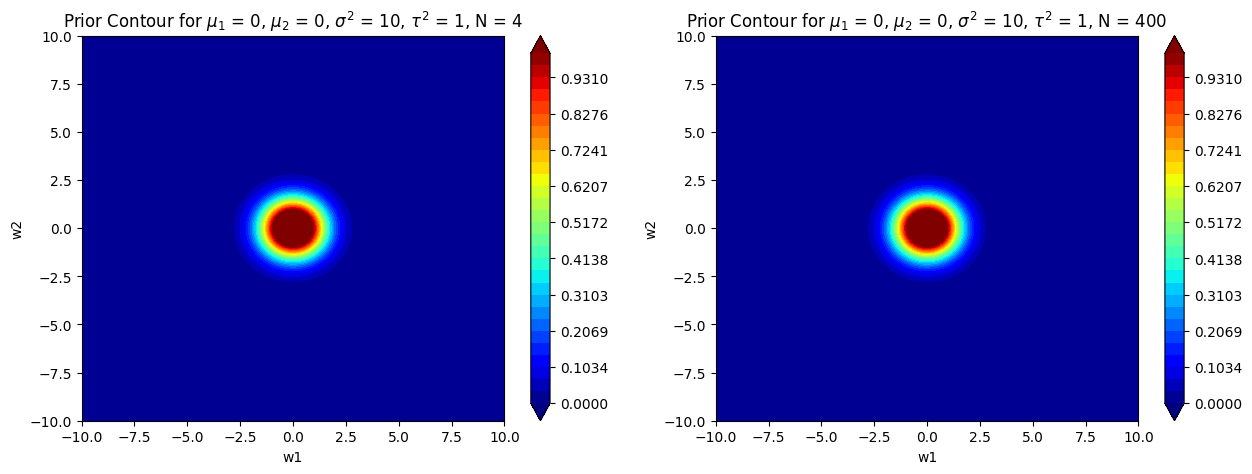

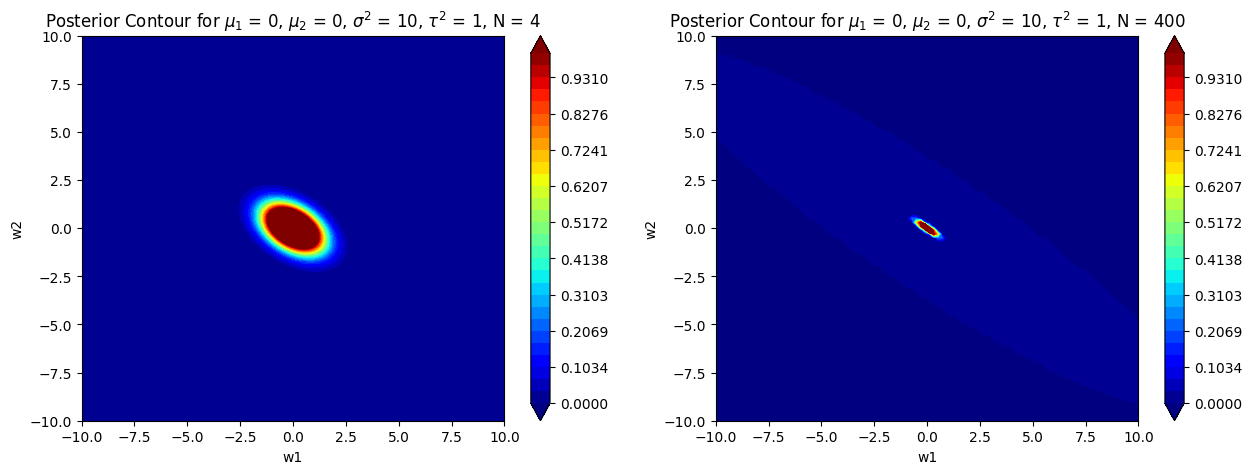

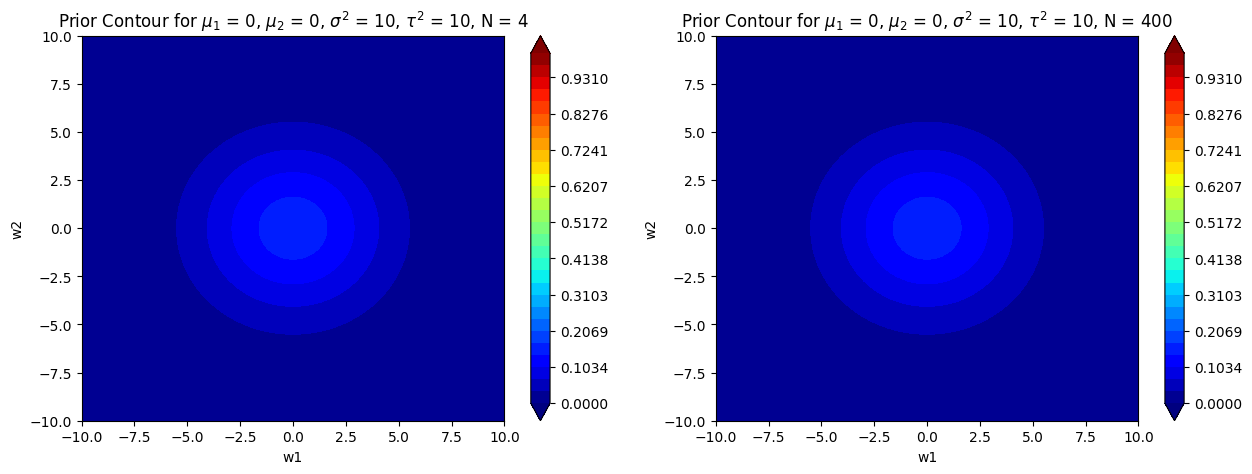

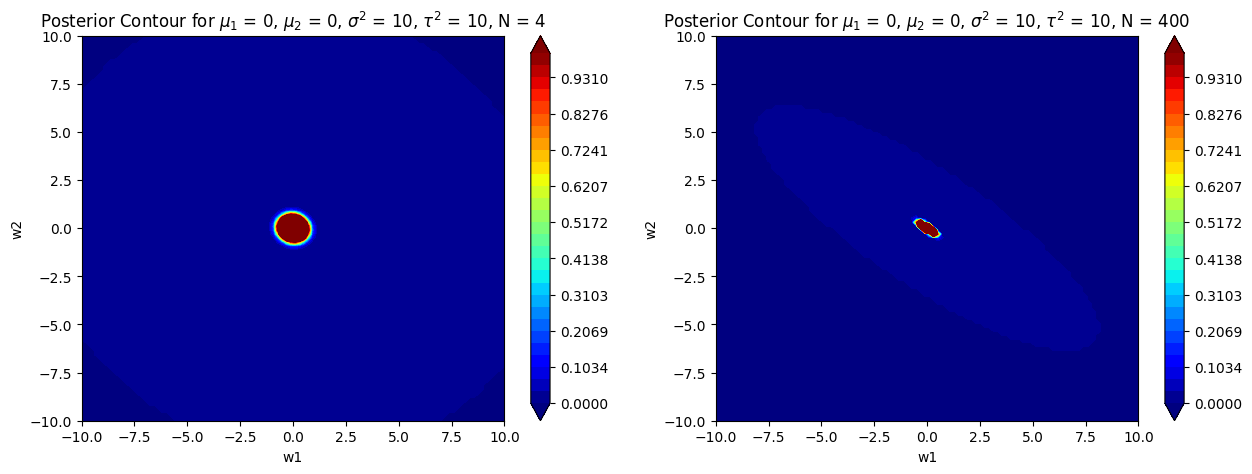

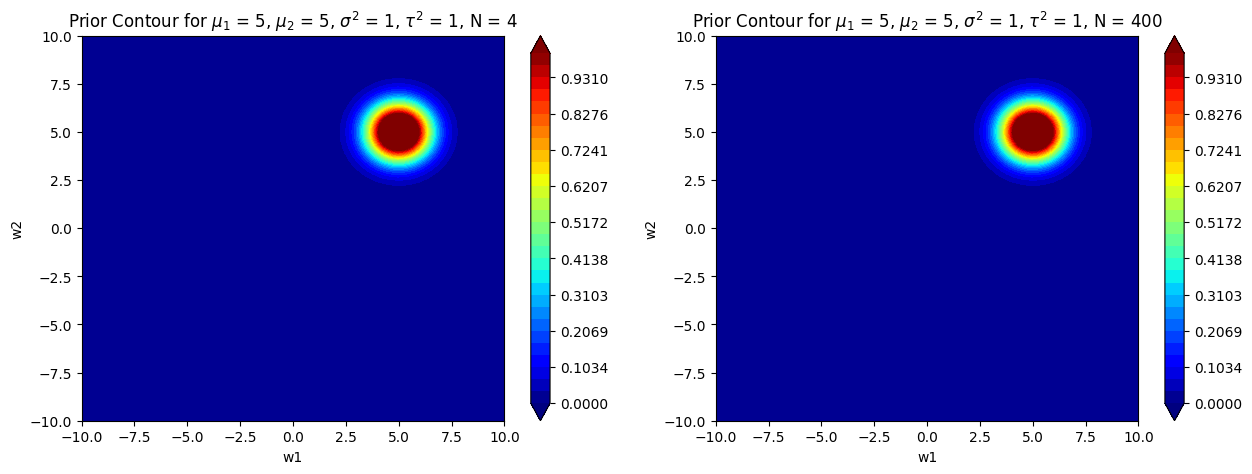

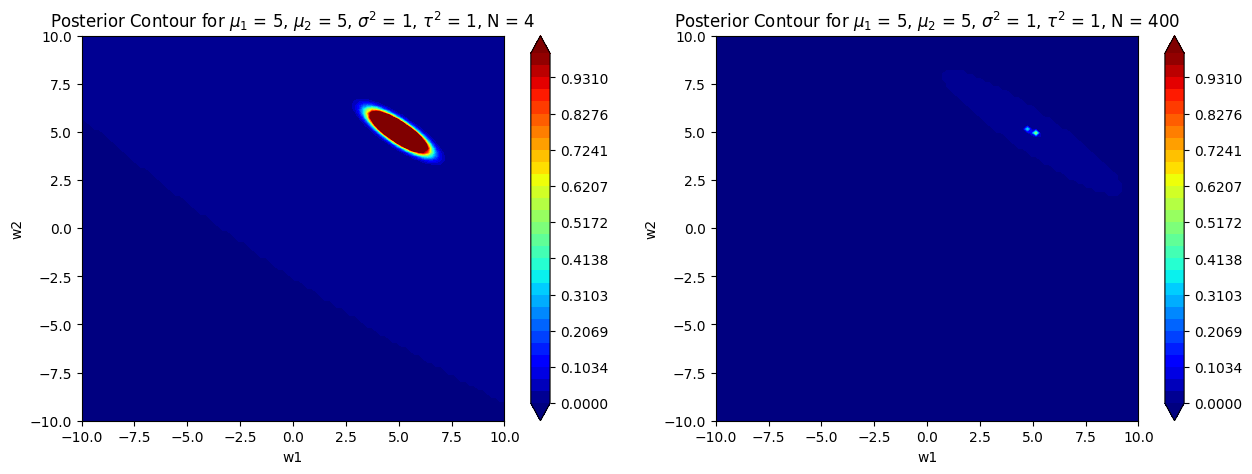

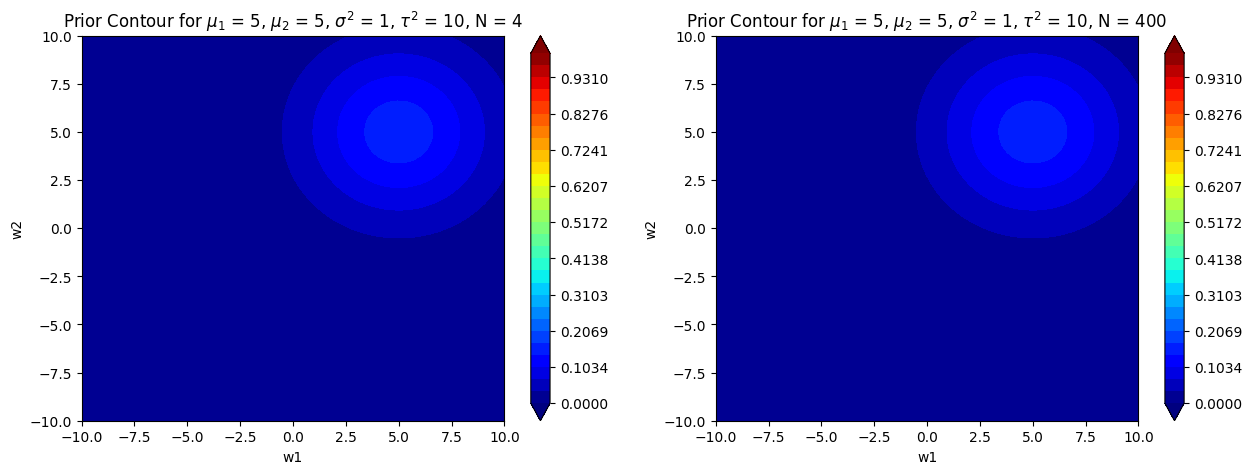

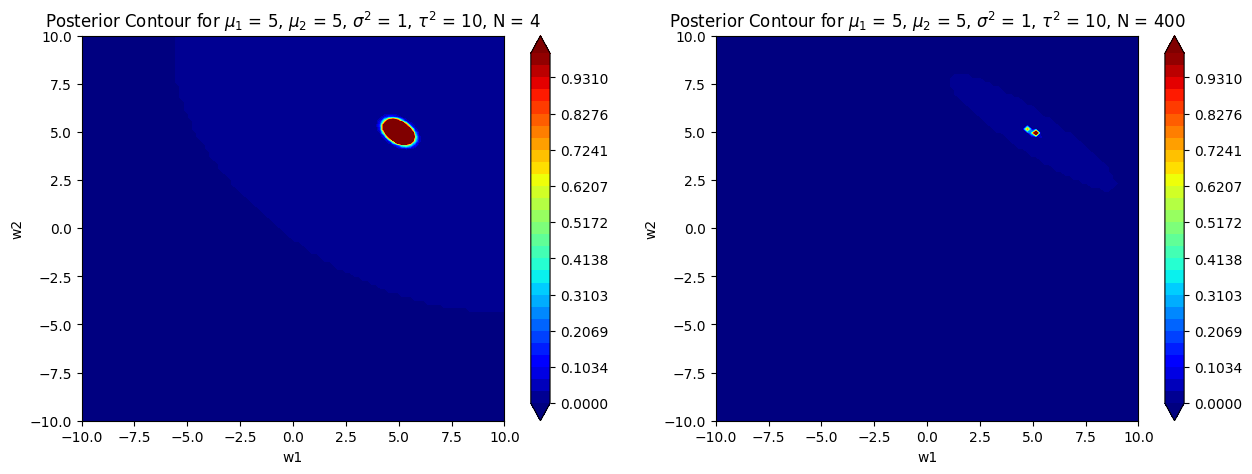

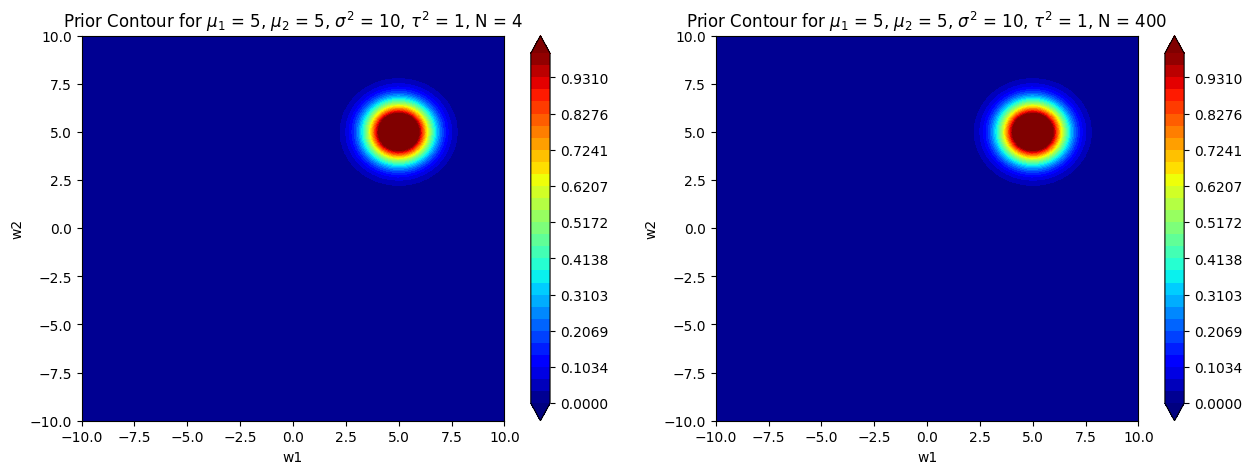

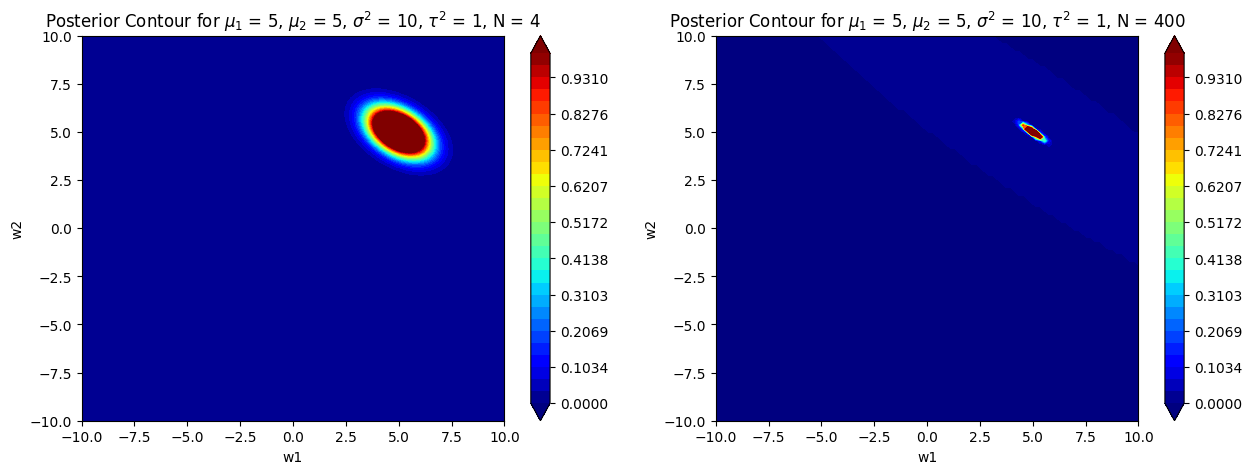

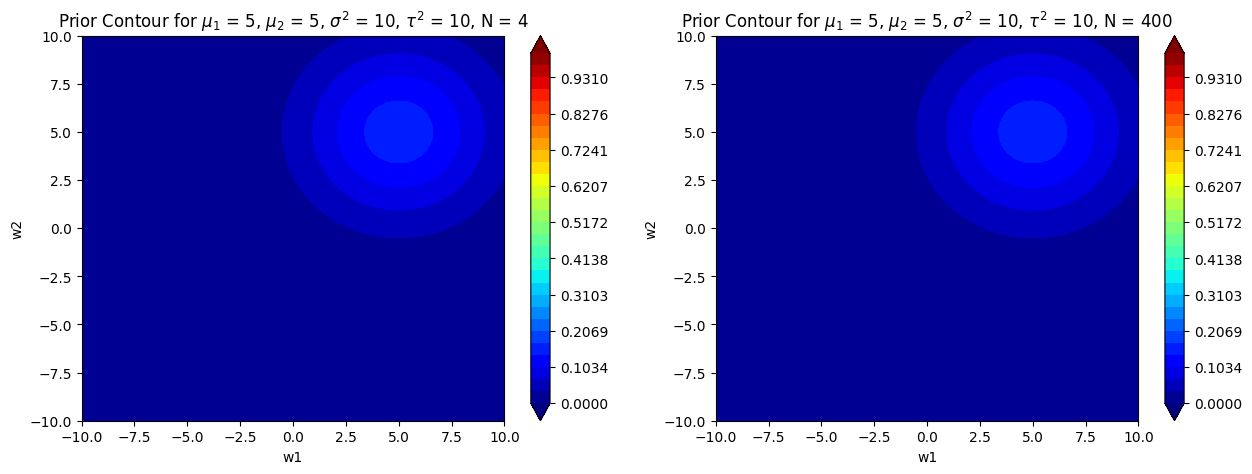

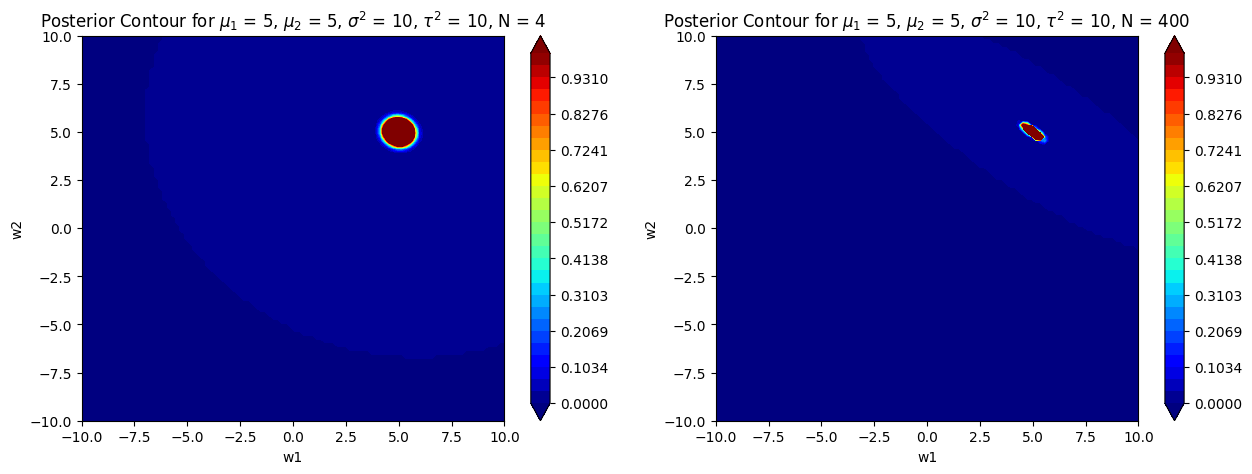

In [2]:
X_1 = np.array([[1., 2.], [2.0, 2.1], [0.6, 1.5], [1.1, 0.9]])
Y_1 = np.array([[5.1], [6.1], [4.2], [2.9]])

X_2 = np.tile(X_1, (100, 1))
Y_2 = np.tile(Y_1, (100, 1))

mu_matrix = [0,5]
sigma_sq_matrix = [1,10]
tau_sq_matrix = [1,10]

for i in range(2):
    for j in range(2):
        for k in range(2):
            mu = mu_matrix[i]
            sigma_sq = sigma_sq_matrix[j]
            tau_sq = tau_sq_matrix[k]

            cov_w = np.eye(2) * tau_sq
            mu_ = np.array([mu] * 2)

            xx = np.linspace(-10.0, 10.0, 100)
            yy = np.linspace(-10.0, 10.0, 100)
            X_, Y_ = np.meshgrid(xx, yy)
            
            Z = np.zeros_like(X_)
            cov_det = np.linalg.det(cov_w)
            
            for m in range(100):
                for n in range(100):
                    w = np.array([X_[m, n], Y_[m, n]])
                    Z[m, n] = (1/2*np.pi)*((cov_det)**(-0.5))*np.exp(-0.5 *(((w - mu_)@ np.linalg.inv(cov_w))@(w - mu_).T))

            f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
            z1_plot = ax1.contourf(X_, Y_, Z, levels=np.linspace(0,1., 30), cmap='jet', extend='both')
            ax1.set_title(f"Prior Contour for $μ_1$ = {mu}, $μ_2$ = {mu}, $σ^2$ = {sigma_sq}, $τ^2$ = {tau_sq}, N = 4")
            plt.colorbar(z1_plot,ax=ax1)
            ax1.set_xlabel('w1')
            ax1.set_ylabel('w2')

            z2_plot = ax2.contourf(X_, Y_, Z, levels=np.linspace(0,1., 30), cmap='jet', extend='both')
            ax2.set_title(f"Prior Contour for $μ_1$ = {mu}, $μ_2$ = {mu}, $σ^2$ = {sigma_sq}, $τ^2$ = {tau_sq}, N = 400")
            plt.colorbar(z2_plot,ax=ax2)  
            ax2.set_xlabel('w1')
            ax2.set_ylabel('w2')
            plt.show()

            posterior_cov_inv = (cov_w + (1 / sigma_sq) * (X_1.T@ X_1))
            posterior_cov = np.linalg.inv(posterior_cov_inv)
            posterior_mu = (1 / sigma_sq)*(posterior_cov)@(X_1.T@Y_1)

            posterior_cov_det = np.linalg.det(posterior_cov)

            for m in range(100):
                for n in range(100):
                    w = np.array([X_[m, n], Y_[m, n]])
                    Z[m, n] = (1/2*np.pi)*((posterior_cov_det)**(-0.5))*np.exp(-0.5 *(((w - mu_)@ np.linalg.inv(posterior_cov))@(w - mu_).T))

            f, (ax3,ax4) = plt.subplots(1,2,figsize=(15,5))
            z3_plot = ax3.contourf(X_, Y_, Z, levels=np.linspace(0,1., 30), cmap='jet', extend='both')
            ax3.set_title(f"Posterior Contour for $μ_1$ = {mu}, $μ_2$ = {mu}, $σ^2$ = {sigma_sq}, $τ^2$ = {tau_sq}, N = 4")
            plt.colorbar(z3_plot,ax=ax3) 
            ax3.set_xlabel('w1')
            ax3.set_ylabel('w2')

            posterior_cov_inv = (cov_w + (1 / sigma_sq) * (X_2.T@ X_2))
            posterior_cov = np.linalg.inv(posterior_cov_inv)
            posterior_mu = (1 / sigma_sq)*(posterior_cov)@(X_2.T@Y_2)

            for m in range(100):
                for n in range(100):
                    w = np.array([X_[m, n], Y_[m, n]])
                    Z[m, n] = (1/2*np.pi)*((posterior_cov_det)**(-0.5))*np.exp(-0.5 *(((w - mu_)@ np.linalg.inv(posterior_cov))@(w - mu_).T))

            z4_plot = ax4.contourf(X_, Y_, Z, levels=np.linspace(0,1., 30), cmap='jet', extend='both')
            ax4.set_title(f"Posterior Contour for $μ_1$ = {mu}, $μ_2$ = {mu}, $σ^2$ = {sigma_sq}, $τ^2$ = {tau_sq}, N = 400")
            plt.colorbar(z2_plot,ax=ax4) 
            ax4.set_xlabel('w1')
            ax4.set_ylabel('w2')
            plt.show()
        

**Observations**

1. Prior distribution is same N = 4 and N = 400 samples as can be observed. We also know that they don't depend on the data samples. 

2. Posterior distribution is also a gaussian distribution. 

3. When $\tau^2$ is greater than $\sigma^2$, the distribution depends more on the data samples and the weight parameter changes with the data samples more easily.